# COVID in Rhode Island: an analytical approach

In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import helpers

helpers.get_covid_data("Demographics")

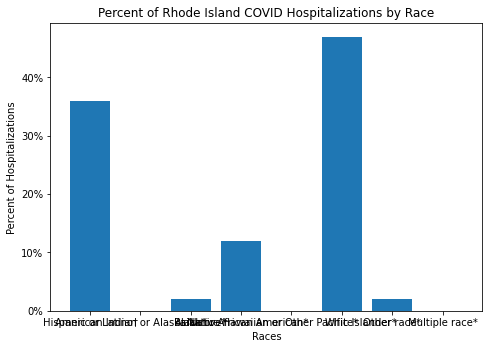

In [76]:
import plot

plot.plot_demographic_data("Race_Hospitalizations")

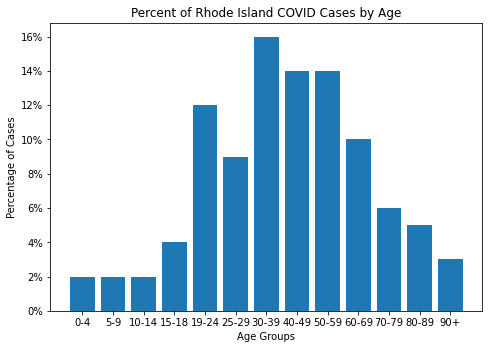

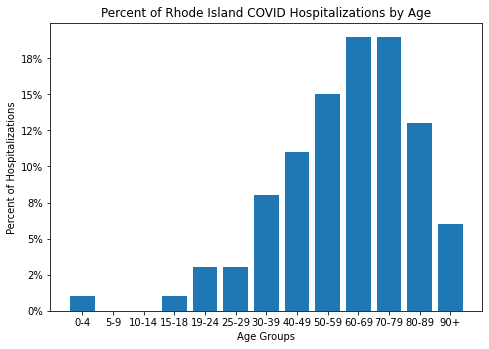

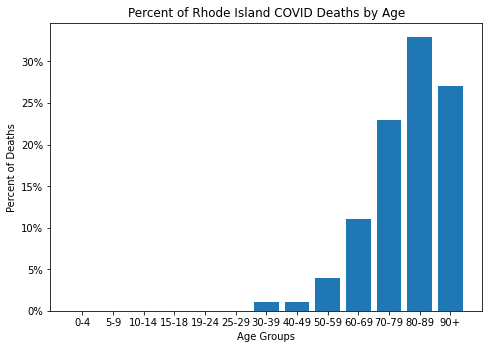

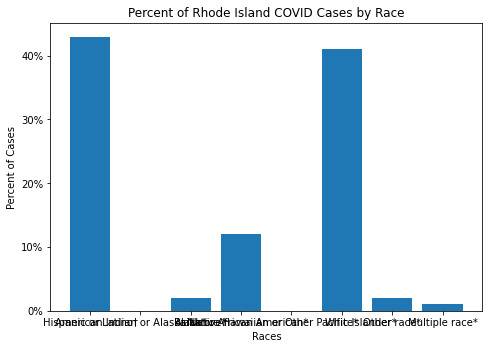

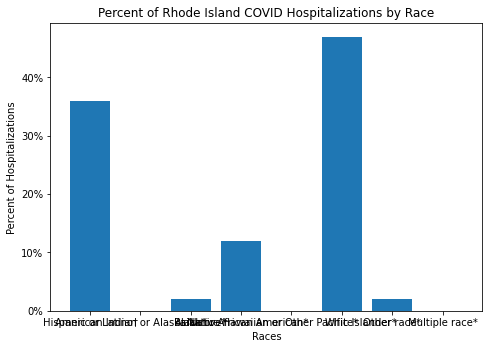

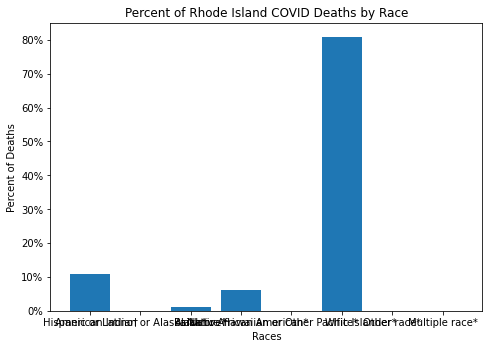

In [77]:
for item in plot.data_dimensions:
    plot.plot_demographic_data(item)

In [78]:
helpers.get_covid_data("Municipality")

In [103]:
import pandas as pd

data = pd.read_csv("Municipality.csv", nrows=39)

print(data)

data.iloc[0,2].to_csv("municipalities.csv", index = False)



   Municipality of residence  Total cases  \
0                 Barrington          121   
1                    Bristol          289   
2               Burrillville          214   
3              Central Falls         1641   
4                Charlestown           51   
5                   Coventry          482   
6                   Cranston         2130   
7                 Cumberland          672   
8             East Greenwich          208   
9            East Providence         1090   
10                    Exeter           63   
11                    Foster           48   
12                 Glocester           92   
13                 Hopkinton           24   
14                 Jamestown           42   
15                  Johnston          902   
16                   Lincoln          472   
17            Little Compton           22   
18                Middletown          101   
19              Narragansett          362   
20              New Shoreham            7   
21        

KeyError: "None of [Int64Index([0, 2], dtype='int64')] are in the [columns]"

In [89]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline
data = pd.read_csv('municipalities.csv')
data.sample(5)

,Municipality of residence
8,East Greenwich
33,Warren
18,Middletown
15,Johnston
28,Richmond


In [94]:
nb = 'shapefiles/Municipalities__1997_.shp'
regions = gpd.read_file(nb)

regions['cleaned'] = regions['NAME'].str.lower()

regions.sample(5)

# regions.plot(figsize=(40,20))
# plt.show()

,OBJECTID,NAME,COUNTY,OSP,TWNCODE,LAND,Shape__Are,Shape__Len,geometry,cleaned
272,273,LITTLE COMPTON,NEWPORT,18,LC,Y,5.655124e-08,0.000940,"POLYGON ((-71.19730 41.44943, -71.19735 41.449...",little compton
343,344,CHARLESTOWN,WASHINGTON,5,CH,Y,2.077775e-06,0.013145,"POLYGON ((-71.63175 41.36582, -71.63171 41.365...",charlestown
43,44,WEST WARWICK,KENT,38,WW,Y,2.267838e-03,0.258762,"POLYGON ((-71.53431 41.73018, -71.53123 41.730...",west warwick
59,60,PORTSMOUTH,NEWPORT,27,PO,Y,4.775547e-03,0.590553,"POLYGON ((-71.22045 41.65165, -71.22050 41.651...",portsmouth
182,183,LITTLE COMPTON,NEWPORT,18,LC,Y,1.004953e-07,0.001323,"POLYGON ((-71.18520 41.45833, -71.18529 41.458...",little compton


In [ ]:
data['count'] = 1
dataByNeighbourhood = data.groupby('neighbourhood').count()[['count']].reset_index()
dataByNeighbourhood['neighbourhood'] = dataByNeighbourhood['neighbourhood'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)